# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [22]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [23]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [24]:
import pandas as pd
df = pd.read_csv('./data/airbnb.csv')
print(df.head())
print(df.shape)
print(df.columns)
print(df.describe())


   room_id  host_id        room_type       neighborhood  reviews  \
0     6499    14455  Entire home/apt              Belém        8   
1    17031    66015  Entire home/apt           Alvalade        0   
2    25659   107347  Entire home/apt  Santa Maria Maior       63   
3    29248   125768  Entire home/apt  Santa Maria Maior      225   
4    29396   126415  Entire home/apt  Santa Maria Maior      132   

   overall_satisfaction  accommodates  bedrooms  price  
0                   5.0             2       1.0   57.0  
1                   0.0             2       1.0   46.0  
2                   5.0             3       1.0   69.0  
3                   4.5             4       1.0   58.0  
4                   5.0             4       1.0   67.0  
(13232, 9)
Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')
            room_id       host_id       reviews  overall_satisfaction  \
count

### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [26]:
import pandas as pd
df = pd.read_csv('./data/airbnb.csv')
apartamentos_filtrados = df[(df['reviews'] > 10) & 
                            (df['overall_satisfaction'] > 4) & 
                            (df['bedrooms'] >= 2)]
apartamentos_ordenados = apartamentos_filtrados.sort_values(by=['overall_satisfaction', 'reviews'], 
                                                            ascending=[False, False])

top_3_alternativas = apartamentos_ordenados.head(3)
print(top_3_alternativas)


     room_id  host_id        room_type       neighborhood  reviews  \
120   176153   842219  Entire home/apt       Misericórdia      438   
16     44043   192830  Entire home/apt  Santa Maria Maior      316   
140   202150   989393  Entire home/apt  Santa Maria Maior      274   

     overall_satisfaction  accommodates  bedrooms  price  
120                   5.0             4       2.0  102.0  
16                    5.0             7       3.0   80.0  
140                   5.0             4       2.0   62.0  


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [ ]:
import pandas as pd
df = pd.read_csv('./data/airbnb.csv')
propiedades_roberto_clara = df[df['room_id'].isin([97503, 90387])]
propiedades_roberto_clara.to_excel('roberto.xls', index=False)
print(propiedades_roberto_clara)


ValueError: No engine for filetype: 'xls'


#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [3]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")
presupuesto_maximo = 50 / 3  # 50€ para 3 noches
propiedades_dentro_presupuesto = df_airbnb[df_airbnb['price'] <= presupuesto_maximo]
propiedades_compartidas = propiedades_dentro_presupuesto[propiedades_dentro_presupuesto['room_type'] == 'Shared room']
propiedades_ordenadas = propiedades_compartidas.sort_values(by=['overall_satisfaction', 'price'], ascending=[False, True])
mejores_propiedades = propiedades_ordenadas.head(10)
print("Las 10 propiedades más baratas, priorizando habitaciones compartidas:")
print(mejores_propiedades[['room_id', 'room_type', 'neighborhood', 'price', 'overall_satisfaction']])


Las 10 propiedades más baratas, priorizando habitaciones compartidas:
        room_id    room_type       neighborhood  price  overall_satisfaction
9065   14933182  Shared room      Santo António   11.0                   5.0
6056   10397682  Shared room       Misericórdia   13.0                   5.0
7060   12299998  Shared room            Arroios   13.0                   5.0
7066   12305540  Shared room            Arroios   13.0                   5.0
8918   14719962  Shared room     Avenidas Novas   13.0                   5.0
7034   12268067  Shared room            Arroios   16.0                   5.0
9964   16150682  Shared room     Avenidas Novas   16.0                   5.0
10723  17096560  Shared room            Areeiro   16.0                   5.0
4353    6728244  Shared room  Santa Maria Maior   11.0                   4.5
5616    9317561  Shared room            Arroios   11.0                   4.5


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


/tmp/ipykernel_3115/665751675.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='neighborhood', data=grouped_neighborhood, palette='viridis')


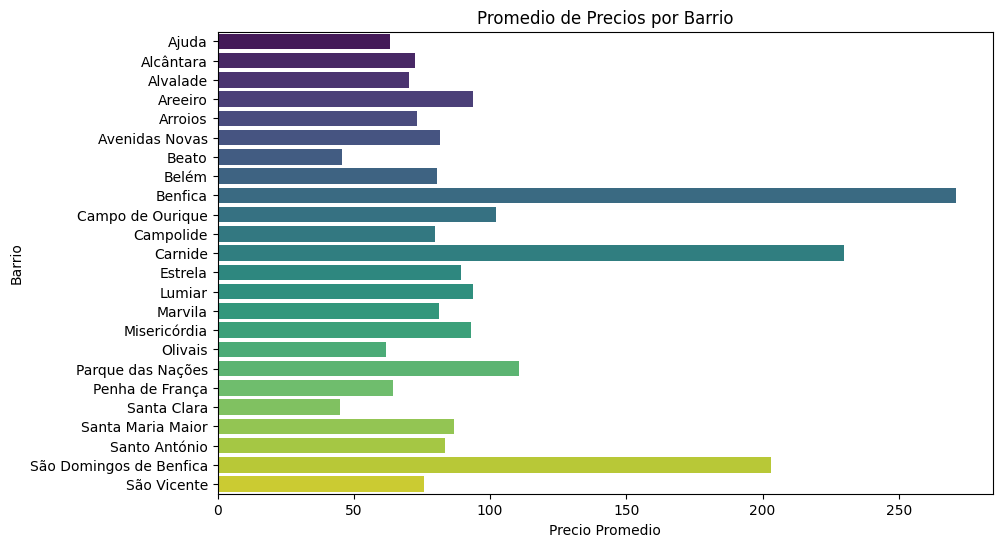

/tmp/ipykernel_3115/665751675.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='reviews', data=grouped_room_type, palette='coolwarm')


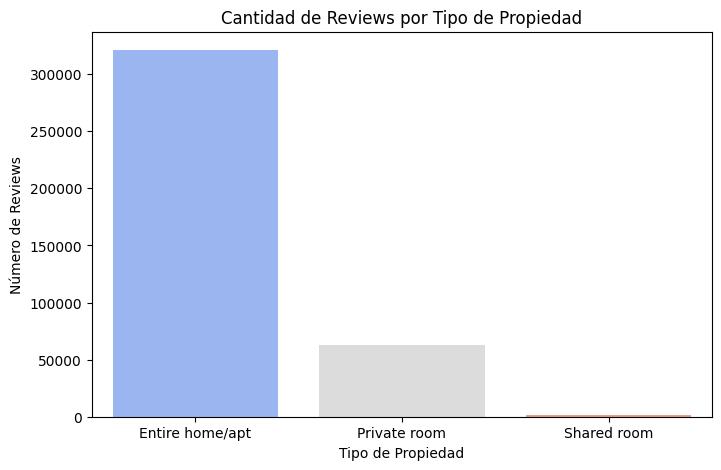

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('./data/airbnb.csv')
grouped_neighborhood = data.groupby('neighborhood')['price'].mean().reset_index()
grouped_room_type = data.groupby('room_type')['reviews'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighborhood', data=grouped_neighborhood, palette='viridis')
plt.title('Promedio de Precios por Barrio')
plt.xlabel('Precio Promedio')
plt.ylabel('Barrio')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='reviews', data=grouped_room_type, palette='coolwarm')
plt.title('Cantidad de Reviews por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Número de Reviews')
plt.show()
with pd.ExcelWriter('resultados_agrupados.xlsx', engine='openpyxl') as writer:
    grouped_neighborhood.to_excel(writer, sheet_name='PreciosPorBarrio', index=False)
    grouped_room_type.to_excel(writer, sheet_name='ReviewsPorTipo', index=False)

